<a href="https://colab.research.google.com/github/roodra01/Projects/blob/main/Analysis_post_2000s_terrorism_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Analysis of Global Terrorism Data


The Global Terrorism Database™ (GTD) is an open-source database including information on terrorist events around the world from 1970 through 2020 (with annual updates planned for the future). Unlike many other event databases, the GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 200,000 cases. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland. The database is extemely descriptive and we can analyze the set to see if we can learn anything of interest.

*   List item
*   List item



First let's prep our data.

In [18]:
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

df=pd.read_csv('/content/drive/MyDrive/globalterrorismdb_0522dist.csv')


<ipython-input-18-160bd3604153>:12: DtypeWarning:

Columns (4,31,33,54,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df.head()


eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region                   region_txt provstate  \
0  Dominican Republic       2  Central America & Caribbean  National   
1              Mexico       1                North America   Federal   
2         Philippines       5               Southeast Asia    Tarlac   
3              Greece       8               Western Europe    Attica   
4               Japan       4                    East Asia   Fukouka   

            city   latitude   longitude  specificity  vicinity location  \
0  Santo Domingo  18.456792  -69.951164          1.0         0      NaN   
1    Mexico city  19.371887  -99.086624          1.0         0      NaN   
2        Unknown  15.478598  120.599741          4.0         0      NaN   
3         Athens  37.997490   23.762728          1.0         0      NaN   
4        Fukouka  33.580412  130.396361          1.0         0      NaN   

  summary  crit1  crit2  crit3  doubtterr  alternative alternative_txt  \
0     NaN      1      1      1          0          NaN             NaN   
1     NaN      1      1      1          0          NaN             NaN   
2     NaN      1      1      1          0          NaN             NaN   
3     NaN      1      1      1          0          NaN             NaN   
4     NaN      1      1      1         -9          NaN             NaN   

   multiple  success  suicide  attacktype1                 attacktype1_txt  \
0       0.0        1        0            1                   Assassination   
1       0.0        1        0            6     Hostage Taking (Kidnapping)   
2       0.0        1        0            1                   Assassination   
3       0.0        1        0            3               Bombing/Explosion   
4       0.0        1        0            7  Facility/Infrastructure Attack   

   attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
0          NaN             NaN          NaN             NaN         14   
1          NaN             NaN          NaN             NaN          7   
2          NaN             NaN          NaN             NaN         10   
3          NaN             NaN          NaN             NaN          7   
4          NaN             NaN          NaN             NaN          7   

                 targtype1_txt  targsubtype1  \
0  Private Citizens & Property          68.0   
1      Government (Diplomatic)          45.0   
2          Journalists & Media          54.0   
3      Government (Diplomatic)          46.0   
4      Government (Diplomatic)          46.0   

                                    targsubtype1_txt  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   
2                    Radio Journalist/Staff/Facility   
3                                  Embassy/Consulate   
4                                  Embassy/Consulate   

                         corp1                  target1  natlty1  \
0                          NaN             Julio Guzman     58.0   
1  Belgian Ambassador Daughter  Nadine Chaval, daughter     21.0   
2             Voice of America                 Employee    217.0   
3                          NaN             U.S. Embassy    217.0   
4                          NaN           U.S. Consulate    217.0   

          natlty1_txt  targtype2 targtype2_txt  targsubtype2 targsubtype2_txt  \
0  Dominican Republic        NaN           NaN           NaN              NaN   
1             Belgium        NaN           NaN           NaN              NaN   


I see there is a column for kills and wounded but there is no column for casualties. I will just go ahead and add that. There are a lot of columns here that we probably will not be using. Let's just

In [2]:
df['casualties']= (df['nkill']+df['nwound']).fillna(0)


I also see columns for year, month, and date. First I'm going to rename them to make it easier to read and remember and then I'm going to create a single date column that is in pythons datetime form for future use.

In [3]:
df.rename(columns = {'iyear':'year', 'imonth':'month',
                              'iday':'day'}, inplace = True)
print('Count of rows with day/month with zero:', df['day'].value_counts()[0])
print('Count of rows in the dataset:', len(df.index))
dfzero=df[(df['month'] == 0) | (df['day']==0)]
print(df['casualties'].sum())

print(dfzero['casualties'].sum())
df1=df[(df['month'] != 0) & (df['day']!=0)]
df['DATE'] = pd.to_datetime(df1[['year', 'month', 'day']])


Count of rows with day/month with zero: 891
Count of rows in the dataset: 209706
989396.0
1626.0


 Some of the days/months have zero for cases where they didn't know the month/day. If you add up all the casualities from the days/months with zero you get 1626. Not a

## 1. Terrorism Over The Years
In this section we will begin mining the dataset to answer the following questions:


*   How has the number of terrorist activities changed over time?
*    Are there certain regions where this trend is different from the global averages?




In [ ]:
attack_over_years=df['year'].value_counts().sort_index()
attack_over_years

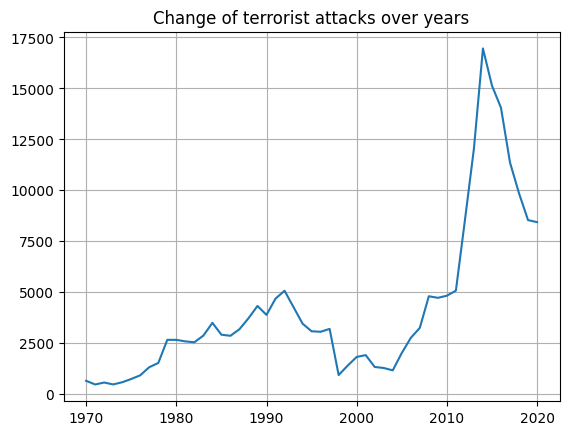

In [ ]:
index=attack_over_years.index.tolist()
attack_over_years.plot.line( title='Change of terrorist attacks over years', grid=True)
plt.show(block=True)

Clearly the number of terrorist attacks have gone up since around 2000. I wonder how much that has to do with instablility in the Middle East and sorrounding areas. You can also see a decline in terorrist activitiy around the early 1990s and both a sharp increase and decrease in terrorist activities in the  early to mid 2010s. Let's take a close look at that both those time periods to see exactly what was going on, starting with the 2010s.

In [ ]:
df1=df[df['year']>1999]
terror_region=pd.crosstab(df1.year,df1.region_txt)
terror_region = terror_region.reset_index().rename(columns={"index":"year"})
fig=px.line(terror_region, x="year", y=terror_region.columns, title='Terrorist Attacks by Region')
fig.update_xaxes(dtick="%Y", tickformat="%Y")
fig.show()

We can see here that around 2011-2012 was when the increase in terrorist activity started happening. The Middle East, North Africa, and South Asia are where the majority of increase happened. Let's take a closer look at these areas to find out exactly where this increase in activity happened and where it declines too.

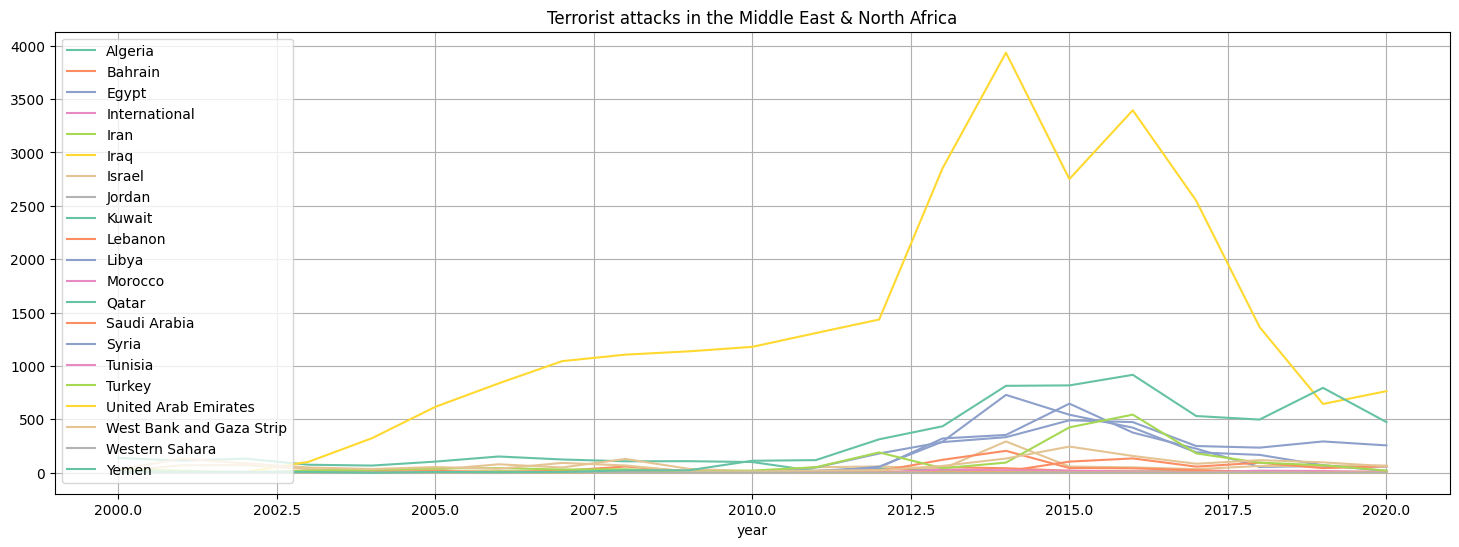

In [ ]:
df1=df[(df['region_txt'] == 'Middle East & North Africa') & (df['year']>1999)]
terror_region=pd.crosstab(df1.year,df1.country_txt)
terror_region.plot(title='Terrorist attacks in the Middle East & North Africa', color=sns.color_palette('Set2',12), grid=True)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.legend(loc='upper left')
plt.show()

Here we can see that the vast majority of the increase in terrorist attacks took place in Iraq. The increase started mid 2011 and increases by around 2500 which accounts for a big chunk of the increase in world terrorist activity in 2011. When it come's to the actual reason for the increase in terrorist activity you can see that the increase and eventual decrease in terrorist activity coincides with the timeline for the Iraqi insurgency. So it's likely that the Iraqi insurgency is the main cause for the increase.

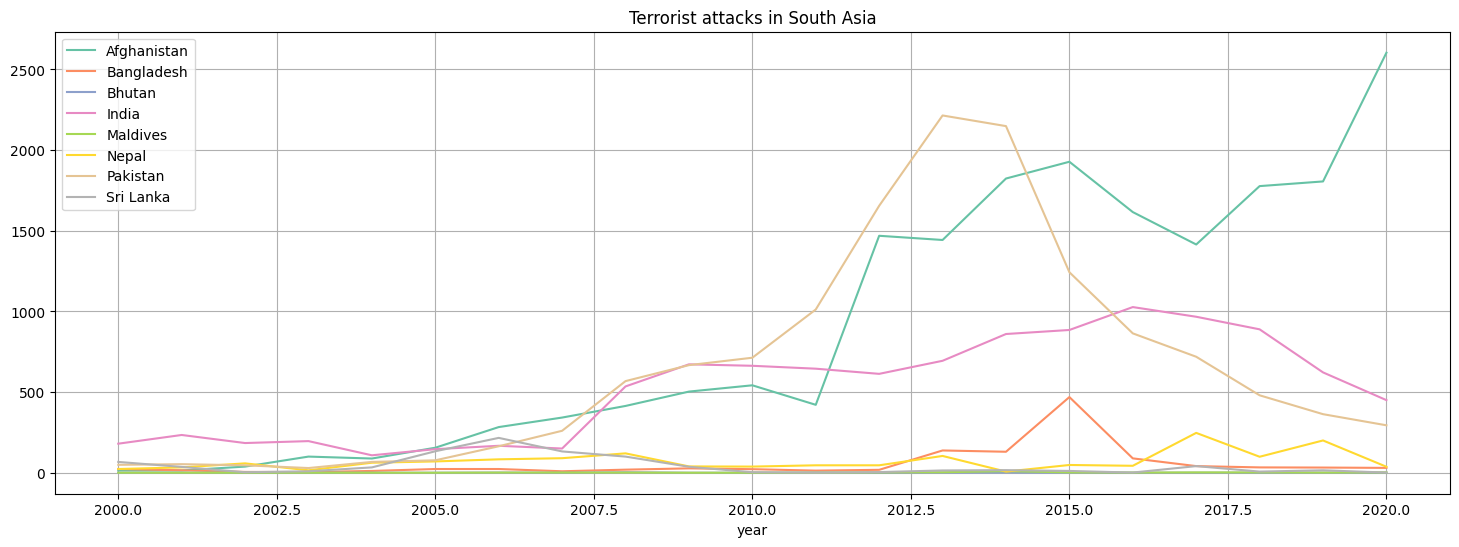

In [ ]:
df1=df[(df['region_txt'] == 'South Asia') & (df['year']>1999)]
terror_region=pd.crosstab(df1.year,df1.country_txt)
terror_region.plot(title='Terrorist attacks in South Asia', color=sns.color_palette('Set2',12), grid=True)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.legend(loc='upper left')
plt.show()

Here we can see that the majority of the increase in terrorist activity took place in Pakistan and Afganistan. This was probably due to the spread of religious extremism as well as the worsening socioeconomic conditions in Pakistan and Afganistan. Around 2014 we can see a decrease in terrorist activity in Pakistan. This decrease is largely due to the Pakistani army's actions the Taliban. You can read more about it [here](https://www.visionofhumanity.org/country-close-up-terrorism-in-iraq/).


Now that we know where exactly the increase and decrease in activity took place, let's take a look at the spread of terrorist activity over the years in the Middle East, South Asia, and North Africa.

In [ ]:
dfscaled=df.copy()
dfscaled['casualties1']=dfscaled['casualties']+100 #for scaling purposes so you can see the dots on the map

fig = px.scatter_mapbox(dfscaled,
              lat="latitude" ,
              lon="longitude",
              title= "Spread of Terrorist Activity",
              size='casualties1',
              hover_data={'casualties': True, 'casualties1':False},
              animation_frame="year",
              mapbox_style='carto-positron',

              zoom=2.7,
              center={'lat': 32.3451, 'lon': 54.6659},
              height=800,
              width=800)
fig.show();

If you explored the above map please click the reset view icon before reading below (the little house on the type right of the map).

It is easy to see the spread of terrorism when looking at this animation but something interesting to note are the countries that terrorism did not spread to. If all you knew was was that Iraq, Afganistan, and Pakistan had an extremely high number of terrorist attacks, then you would expect the terrorism to spread to Iran (who is sorrounded by these three countries). However, Iran somehow manages to keep  their country terrorism free mostly. Saudia Arabia is another example of this. If you are looking to find out how to combat terrorism, Iran and Saudi Arabia are the countries to look into.

I encourage you to explore the spread of terrorism activity animation and check out other regions.

## 2. Terrorism By Month
Now let's see if there is any relationship between terrorist attacks and time of year. I suspect that the warmer months will have more terrorist activity in general.

In [ ]:
attack_over_months=df['month'].value_counts().sort_index()


attack_over_months= pd.DataFrame(attack_over_months.drop(labels=[0])).reset_index()
attack_over_months
attack_over_months['month_txt']= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October','November', 'December']
range_r=[15000, 20000]
fig = px.line_polar(attack_over_months, r='month', theta='month_txt', line_close=True, range_r=range_r )
fig.show()


In [ ]:
none_warm_average=(attack_over_months['month'][0]+attack_over_months['month'][1]+attack_over_months['month'][8]+attack_over_months['month'][9]+attack_over_months['month'][10]+attack_over_months['month'][11])/6
warm_average=(attack_over_months['month'][4]+attack_over_months['month'][5]+attack_over_months['month'][6]+attack_over_months['month'][7]+attack_over_months['month'][2]+attack_over_months['month'][3])/6

print('March through August has an average of',  ((warm_average-none_warm_average)/none_warm_average)*100, '% more terrorist attacks')




March through August has an average of 9.085923399842459 % more terrorist attacks


From this chart you can clearly see that from March to August (spring/summer in the Northern Hemisphere) there are a higher  number of terrorist attacks.

I wonder if that has to do with weather patterns. Let's seperate the data by hemisphere to see if there is any difference.

In [ ]:
df_north= df[df['latitude']>0]


attack_over_months=df_north['month'].value_counts().sort_index()


attack_over_months= pd.DataFrame(attack_over_months.drop(labels=[0])).reset_index()
attack_over_months
attack_over_months['month_txt']= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October','November', 'December']
range_r=[13000, 18000]
fig = px.line_polar(attack_over_months, title='Terrorism by Months in the Northern Hemisphere', r='month', theta='month_txt', line_close=True, range_r=range_r )
fig.show()


In [ ]:
none_warm_average=(attack_over_months['month'][0]+attack_over_months['month'][1]+attack_over_months['month'][8]+attack_over_months['month'][9]+attack_over_months['month'][10]+attack_over_months['month'][11])/6
warm_average=(attack_over_months['month'][4]+attack_over_months['month'][5]+attack_over_months['month'][6]+attack_over_months['month'][7]+attack_over_months['month'][2]+attack_over_months['month'][3])/6

print('March through August has an average of',  ((warm_average-none_warm_average)/none_warm_average)*100, '% more terrorist attacks')

March through August has an average of 8.85555555555556 % more terrorist attacks


So we can see that the Spring/Summer months being higher in terrorism still holds for the Northern Hemisphere.

In [ ]:
df_south= df[df['latitude']<=0]


attack_over_months=df_south['month'].value_counts().sort_index()


attack_over_months= pd.DataFrame(attack_over_months.drop(labels=[0])).reset_index()
attack_over_months
attack_over_months['month_txt']= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October','November', 'December']
range_r=[1000, 1700]
fig = px.line_polar(attack_over_months, title='Terrorism by Months in the Southern Hemisphere', r='month', theta='month_txt', line_close=True, range_r=range_r )
fig.show()

In [ ]:
df_south_near_equator=df[(df['latitude']<=0) & (df['latitude']>=-30)]
print('Number of terrorist attacks close to the equator: ',  len(df_south_near_equator), '\n', 'Percent of the total terrorist attacks in the Southern Hemisphere:',
 ((len(df_south_near_equator))/len(df_south))*100, '%')

Number of terrorist attacks close to the equator:  13209 
 Percent of the total terrorist attacks in the Southern Hemisphere: 77.56312389900177 %


So two things to note when it comes to the Southern Hemisphere:

1) We don't have as much data for the southern hemisphere just because terrorist attacks are not as common. The reason is that southern hemisphere holds only 10-12% of the global population so of course we would get less terrorist activity and Australia is remarkably terrorist free (something to investigate).

2) For locations near the equator, seasons don't mean as much because the climate stays stable. Infact latitudes within 30 degrees of the equators are within the "tropical zone". If you look above, you can see  that 77.5% of terrorist attacks in the Southern Hemisphere are within the tropical zone where seasons don't mean as much.

When you put those two points together the graph for the Southern Hemisphere is not as meaningful as the one for the Northern Hemisphere. Still I added it out of curiosity. Not much meaningful information to extract from it though.



## 3. Analysis Of Terrorist Groups

<Axes: title={'center': 'Terrorist Group'}, xlabel='Year', ylabel='Number of attacks'>

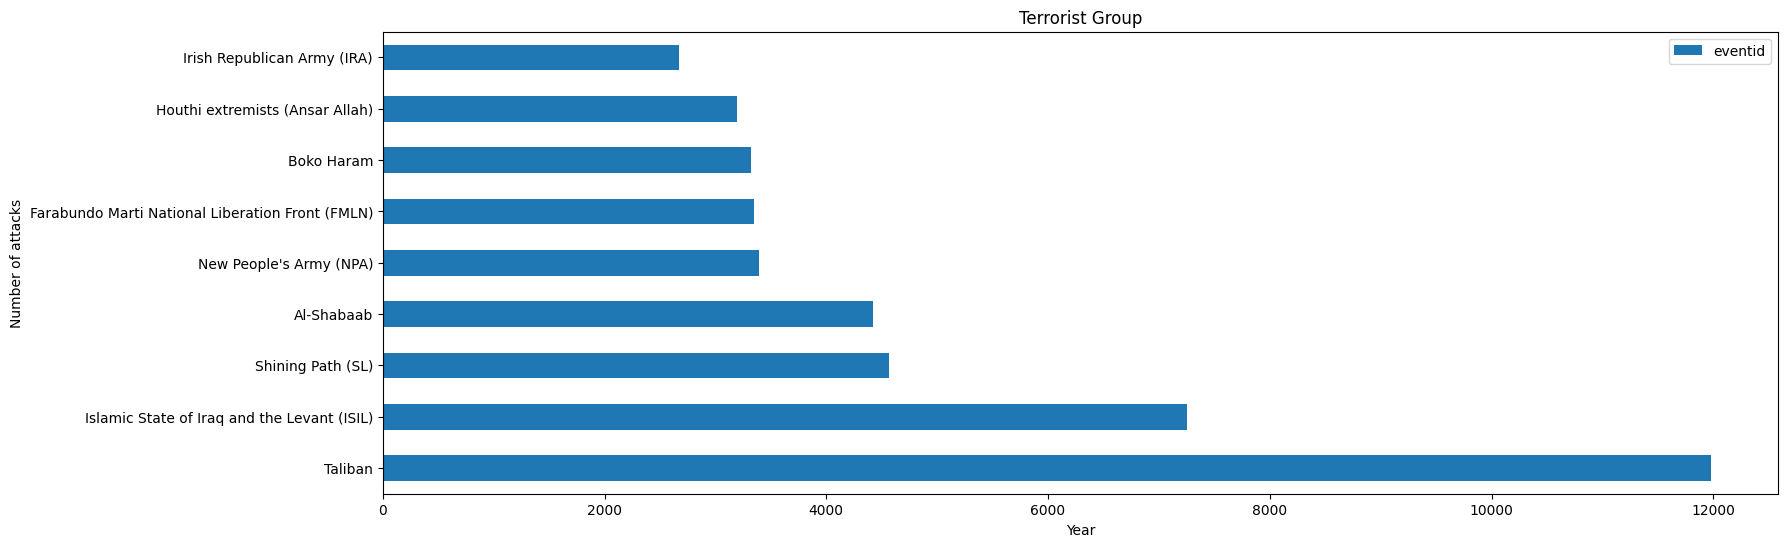

In [ ]:
df1 = df.groupby(['gname'], as_index=True).count()[['eventid']].sort_values(by=['eventid'], ascending=False).head(10).drop(['Unknown'])


df1.plot.barh(xlabel='Number of Attacks', ylabel='Terrorist Group', title='Terrorist Group vs ', figsize=(18, 6))


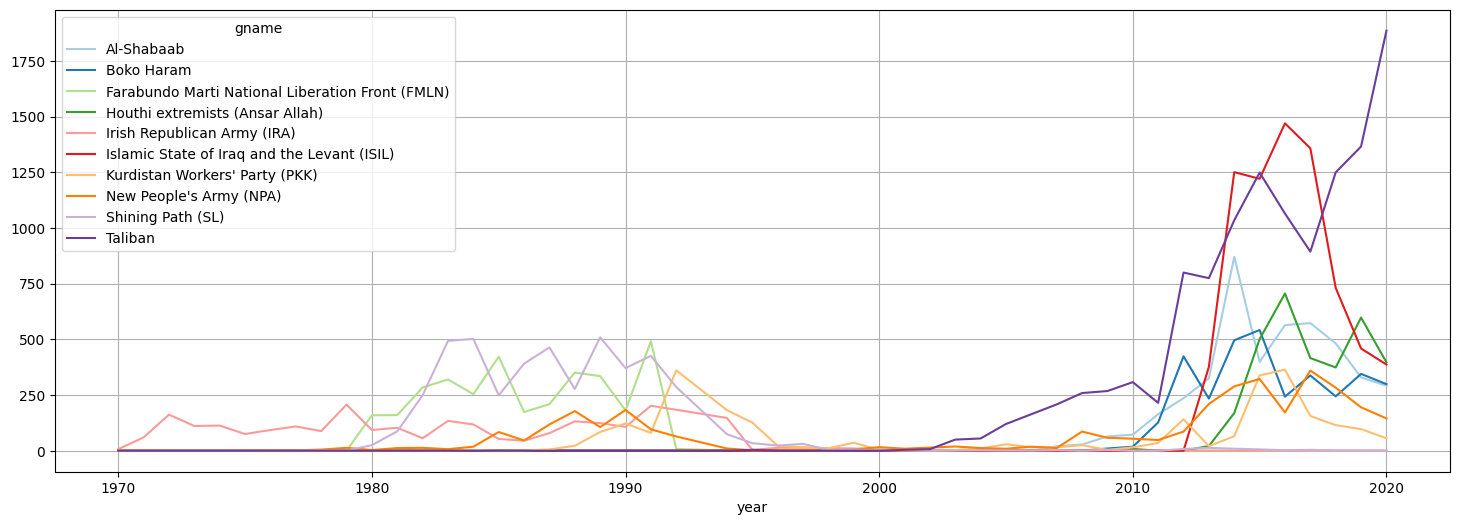

In [ ]:
df_top_10=df[df['gname'].isin(df['gname'].value_counts()[1:11].index)]
pd.crosstab(df_top_10.year,df_top_10.gname).plot(color=sns.color_palette('Paired',10), grid=True)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

The trend for number of attacks by terrorist groups generally match for trend for the number of terrorist  attacks in general except for Taliban whose number of attacks skyrocket in the mid-2010s. Actually, it looks extremely similar to the graph for the Terrorist attacks over time in Afganistan.

In [17]:

dfscaled=df[(df['gname']== 'Taliban')]
dfscaled['casualties1']=dfscaled['casualties']+1 #for scaling purposes so you can see the dots on the map


fig = px.scatter_mapbox(dfscaled,
              lat="latitude" ,
              lon="longitude",
              title= "Taliban Over the Years",
              size='casualties1',
              hover_data={'casualties': True, 'casualties1':False},
              animation_frame="year",
              mapbox_style='carto-positron',

              zoom=2.7,
              center={'lat': 32.3451, 'lon': 54.6659},
              height=800,
              width=800)
fig.update_mapboxes(accesstoken='pk.eyJ1Ijoicm9vZHJhMDEiLCJhIjoiY2xwMDczenE4MDdkMjJpcWl5cGtzaXU2aSJ9.-k3YHwczL2YQLBK9xw4SUQ')
fig.show();

<ipython-input-17-686aef66dfca>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



And now we have a deeper understanding as to what caused terrorism to increase in Afganistan while terrorism decreased across the rest of the world. Next steps would be to look into why exactly have the Taliban increasing attacks while every other terrorist group has decreased.

<Axes: title={'center': 'Deadliest Terrorist Group '}, xlabel='Casualties', ylabel='Terrorist Group'>

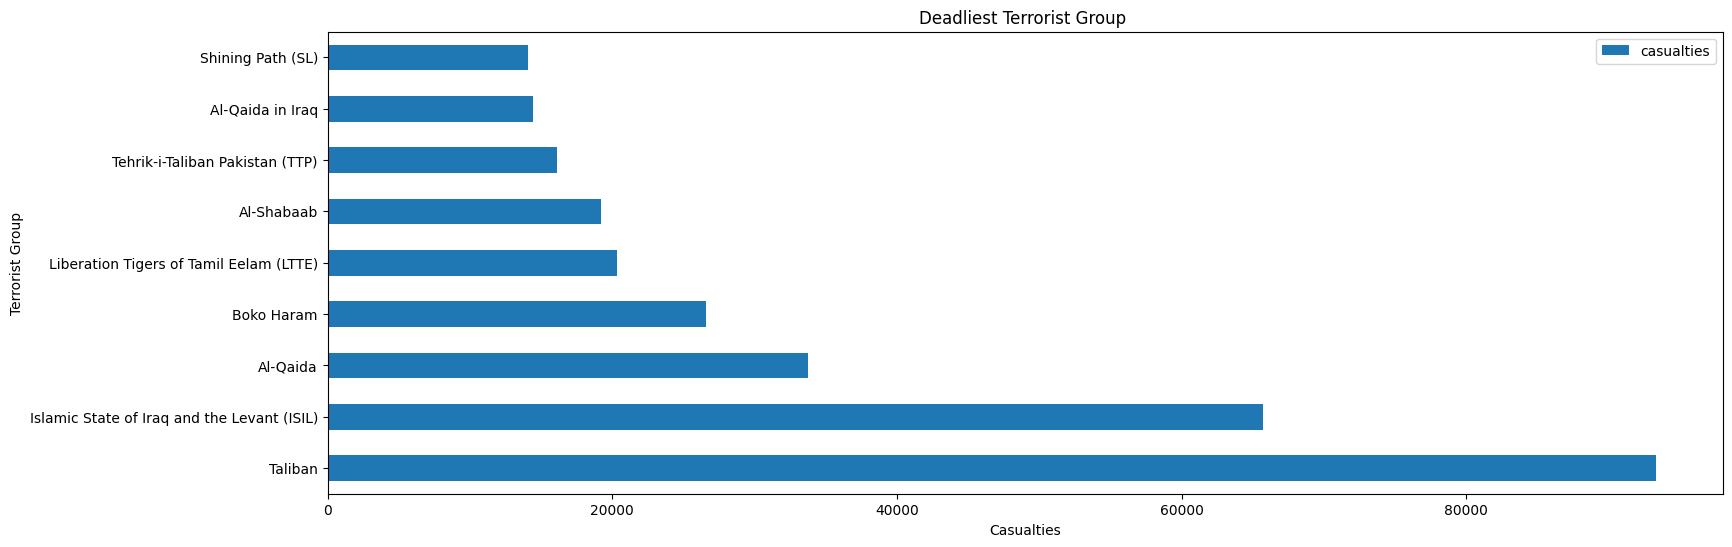

In [12]:
df1 = df.groupby(['gname'], as_index=True).agg({'casualties':'sum'}).sort_values(by=['casualties'], ascending=False).head(10).drop(['Unknown'])




df1.plot.barh(xlabel='Casualties', ylabel='Terrorist Group', title='Deadliest Terrorist Group ', figsize=(18, 6))